In [51]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecednets (Inputs) for calculating winning chance
voice_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'voice_quality')
popularity = ctrl.Antecedent(np.arange(0, 11, 1), 'popularity')
attractivity = ctrl.Antecedent(np.arange(0, 11, 1), 'attractivity')
winning_chance = ctrl.Consequent(np.arange(0, 101, 1), 'winning_chance')

# Membership function population
voice_names = ['poor', 'average', 'gifted']
popularity_level = ['low', 'medium', 'high']
attractivity_level = ['not_attractive', 'so-so', 'very_attractive']
voice_quality.automf(names=voice_names)
popularity.automf(names=popularity_level)
attractivity.automf(names=attractivity_level)

# Set winning_chance universe
winning_chance['low'] = fuzz.trimf(winning_chance.universe, [0, 0, 33])
winning_chance['medium'] = fuzz.trimf(winning_chance.universe, [0, 33, 66])
winning_chance['high'] = fuzz.trimf(winning_chance.universe, [66, 100, 100])

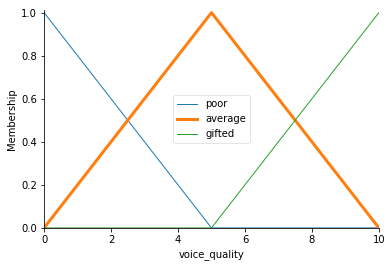

In [52]:
voice_quality['average'].view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0xa1e3ca358>)

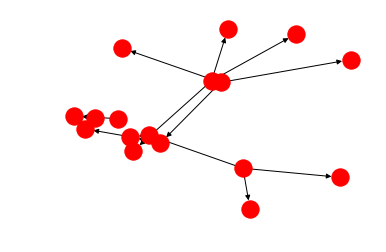

In [53]:
# Set Rules
rule1 = ctrl.Rule(voice_quality['poor'] | popularity['low'] | attractivity['not_attractive'], winning_chance['low'])
rule2 = ctrl.Rule(popularity['medium'] | attractivity['so-so'], winning_chance['medium'])
rule3 = ctrl.Rule(voice_quality['gifted'] | popularity['high'] | attractivity['very_attractive'], winning_chance['high'])

rule1.view()

In [54]:
# Input
participants = [
    {
        "name": "Ziva Magnolia",
        "voice_quality": 8.8,
        "instagram_followers": 82200,
        "attractivity": 7.8
    },
    {
        "name": "Keisya Levronka",
        "voice_quality": 9.3,
        "instagram_followers": 66800,
        "attractivity": 8.4
    },
    {
        "name": "Adi Sihotang",
        "voice_quality": 0.8,
        "instagram_followers": 1021,
        "attractivity": 3.8
    },
]
for participant in participants:
    winning_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
    winning = ctrl.ControlSystemSimulation(winning_ctrl)
    winning.input['voice_quality'] = participant['voice_quality']
    winning.input['popularity']    = participant['instagram_followers'] / 10000
    winning.input['attractivity']  = participant['attractivity']
    winning.compute()
    print("Winning chance of", participant['name'], ':', winning.output['winning_chance'])

Winning chance of Ziva Magnolia : 55.84315156530135
Winning chance of Keisya Levronka : 53.12435388469048
Winning chance of Adi Sihotang : 27.23697323634268
